In [11]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from random import randint

In [ ]:
class RandomPatchEditor(Editor):
    """
    Random patch editor

    Args:
        patch_shape (tuple): patch shape
        data (np.ndarray): data

    Returns:
        patch (np.ndarray): patch
    """
    def __init__(self, patch_shape):
        self.patch_shape = patch_shape

    def call(self, data, **kwargs):
        assert data.shape[1] >= self.patch_shape[0], 'Invalid data shape: %s' % str(data.shape)
        assert data.shape[2] >= self.patch_shape[1], 'Invalid data shape: %s' % str(data.shape)
        x = randint(0, data.shape[1] - self.patch_shape[0])
        y = randint(0, data.shape[2] - self.patch_shape[1])
        patch = data[:, x:x + self.patch_shape[0], y:y + self.patch_shape[1]]
        patch = np.copy(patch)  # copy from mmep
        assert np.std(patch) != 0, 'Invalid patch found (all values %f)' % np.mean(patch)
        assert not np.any(np.isnan(patch)), 'NaN found'
        return patch


In [23]:
from random import randint

class RandomCropDataset():
    def __init__(self, patch_shape, x='x', y='y', data_key='Rad'):
        self.patch_shape = patch_shape
        self.x = x
        self.y = y
        self.data_key = data_key
    def __call__(self, ds):
        assert ds[self.x].shape[0] >= self.patch_shape[0], 'Invalid dataset shape: %s' % str(dataset[self.x].shape)
        assert ds[self.y].shape[0] >= self.patch_shape[1], 'Invalid dataset shape: %s' % str(dataset[self.y].shape)
        xmin = randint(0, ds[self.x].shape[0] - self.patch_shape[0])
        ymin = randint(0, ds[self.y].shape[0] - self.patch_shape[1])
        patch_ds = ds.sel({self.x: slice(ds[self.x][xmin], ds[self.x][xmin + self.patch_shape[0] - 1]), # 0-based index
                             self.y: slice(ds[self.y][ymin], ds[self.y][ymin + self.patch_shape[1] - 1])}) # 0-based index
        assert patch_ds[self.data_key].std() != 0, 'Invalid patch found (all values %f)' % patch_ds[self.data_key].mean()
        return patch_ds

In [28]:
test_file = '/mnt/disks/goes-data/goes/20200901150018_goes16.nc'
ds = xr.open_dataset(test_file)

In [37]:
crop = RandomCropDataset((256, 256))

In [38]:
patch = crop(ds)
assert patch['Rad'].shape == (16, 256, 256), 'Invalid patch shape: %s' % str(patch['Rad'].shape)

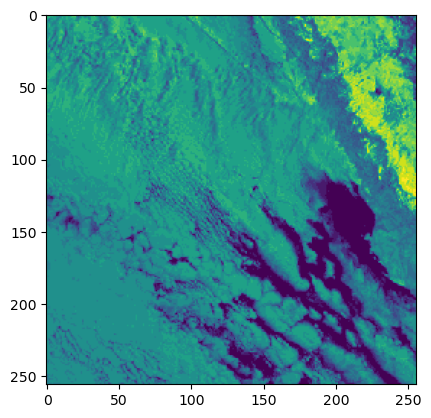

In [39]:
plt.imshow(patch['Rad'].values[5])